# Credit Card Fraud Detection Model

# Introduction
Objective: To develop a machine learning model capable of detecting fraudulent transactions.
Importance: Credit card fraud leads to significant financial losses each year and affects consumer trust.

# Data Overview
Data Source: 'fraud test.csv'
Features: Transaction details including date, time, amount, merchant details, etc.
Initial Handling:
Remove unwanted columns.
Display structure and summary of data.
Identify and handle missing values.

In [1]:
#Importing pandas library
import pandas as pd

In [2]:
#Load the CSV file, and display the 1st 5 rows
df = pd.read_csv("fraud test.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
#Displays each column
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
df.shape

(555719, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [6]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Feature Engineering
Date and Time Processing:
Convert 'trans_date_trans_time' into separate 'trans_date' and 'trans_time' for better analysis.
Feature Reduction:
Remove non-informative features such as 'trans_num', 'cc_num', and names.
Data Split:
60% for training and 40% for testing to evaluate model performance.

In [7]:
date_time = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M')

df['trans_date'] = date_time.dt.date[0]
df['trans_time'] = date_time.dt.time[0]

In [8]:
df.drop(columns='trans_date_trans_time', inplace=True)

In [9]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:00
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:00
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:00
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:14:00
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:14:00


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline

In [11]:
X = df.drop(columns=['is_fraud', 'trans_date', 'trans_time', 'dob', 'first', 'last', 'trans_num', 'cc_num'])
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
pd.DataFrame(X_train).head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long
150349,"fraud_Altenwerth, Cartwright and Koss",shopping_net,6.46,M,15315 Vaughn Park Suite 356,Hovland,MN,55606,47.8342,-90.0476,272,Freight forwarder,1376313291,46.947166,-89.762874
228878,fraud_Waelchi-Wolf,kids_pets,1.24,M,88794 Mandy Lodge Apt. 874,Howells,NE,68641,41.6964,-96.9858,1063,Research scientist (maths),1378909042,42.551265,-96.065037
176492,fraud_Parker-Kunde,personal_care,184.29,F,0107 Clements Point,American Fork,UT,84003,40.3928,-111.7941,42384,Futures trader,1377180135,41.355472,-112.497870
40368,"fraud_Ruecker, Beer and Collier",shopping_net,143.51,M,4720 Anna Ways,Murrayville,IL,62668,39.5723,-90.2379,1512,Commercial/residential surveyor,1373033811,40.379159,-90.607236
326840,fraud_Dietrich-Fadel,health_fitness,160.36,M,1852 Vincent Isle Suite 328,Newark Valley,NY,13811,42.2281,-76.1625,4354,Further education lecturer,1382631507,42.610266,-76.232530


In [13]:
X_train.shape

(333431, 15)

In [14]:
X_test.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long
119106,"fraud_Bahringer, Schoen and Corkery",shopping_pos,1.07,F,6881 King Isle Suite 228,Higganum,CT,6441,41.4682,-72.5751,5438,"Librarian, academic",1375430128,41.240083,-71.837788
179292,"fraud_Romaguera, Wehner and Tromp",kids_pets,94.99,M,0005 Morrison Land,Mounds,OK,74047,35.8896,-96.0887,7163,Fitness centre manager,1377266716,35.156537,-95.806648
540729,fraud_Berge-Hills,kids_pets,31.28,F,182 Sergio Summit Apt. 129,Browning,MO,64630,40.0290,-93.1607,602,Cytogeneticist,1388247749,39.888665,-93.106804
374360,"fraud_Connelly, Reichert and Fritsch",gas_transport,73.06,M,0005 Morrison Land,Mounds,OK,74047,35.8896,-96.0887,7163,Fitness centre manager,1384425890,36.734101,-96.737345
314574,fraud_Kuphal-Predovic,misc_net,9.99,F,519 Jerry Views,Avoca,IA,51521,41.4768,-95.3509,2036,Engineering geologist,1382147409,40.922072,-94.899388


In [15]:
X_test.shape

(222288, 15)

# Preprocessing Steps
Handling Numerical Data:
Impute missing values using the mean.
Handling Categorical Data:
Impute missing values using the most frequent category.
Encode categorical features using OrdinalEncoder.

In [16]:
numerical_columns = [2, 7, 8, 9, 10, 12, 13, 14]
nominal = [0, 1, 3, 4, 5, 6, 11]

In [17]:
handle_numerical = Pipeline(steps=[
    ('impute_numerical', SimpleImputer(strategy='mean'))
])

In [18]:
handle_categorical = Pipeline(steps=[
    ('impute_cat', SimpleImputer(strategy='most_frequent')),
    ('encode_cat', OrdinalEncoder())
])

In [19]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('categorical', handle_categorical, nominal)
], remainder='passthrough')

# Model Building
Model Chosen: Decision Tree Classifier
Reasons for choice: Simple to understand, capable of handling both numerical and categorical data.
Pipeline Creation:
Combine preprocessing steps and model training in a pipeline for clean and efficient code.

In [20]:
model = DecisionTreeClassifier()

In [21]:
pipe = make_pipeline(preprocessing, model)

# Model Training and Evaluation
Training:
Fit the model on the training data.
Testing:
Predict on the test data.
Performance Metric:
Accuracy Score: Measure how often the model correctly identifies fraud.

In [22]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute_numerical',
                                                                   SimpleImputer())]),
                                                  [2, 7, 8, 9, 10, 12, 13, 14]),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode_cat',
                                                                   OrdinalEncoder())]),
                                                  [0, 1, 3, 4, 5, 6, 11])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [23]:
y_pred = pipe.predict(X_test)

# Results
Accuracy of the Model: Display the computed accuracy from the test data.
Discussion:
What the accuracy tells us about the model's performance.
Potential reasons for performance level.
Suggestions for model improvement (e.g., hyperparameter tuning, using a different algorithm).

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9965945080256244


In [25]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[221003    424]
 [   333    528]]


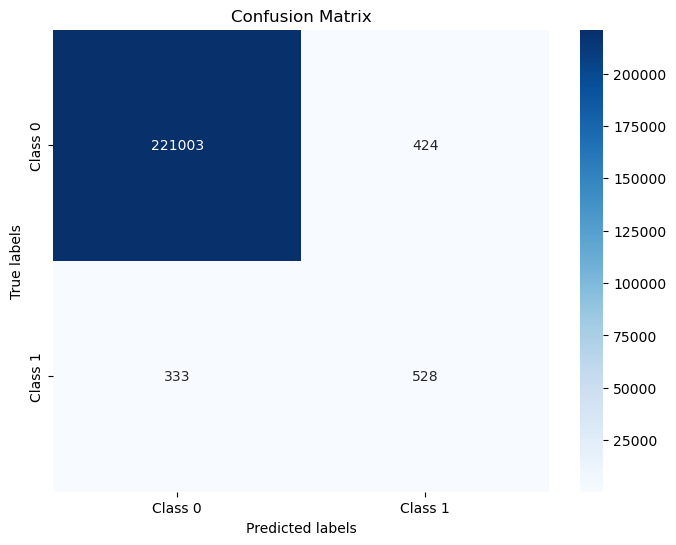

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define classes
classes = ["Class 0", "Class 1"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()